# Amazon Dataset Exploration

# Dataset description

Data set contains 1463 Amazon transactions from India with each row representing one transaction.

Columns of data set are

product_id: Product ID

product_name: Name of product

category: Product category

discounted_price: Discounted price of product

actual_price: Actual product price

discount_percentage: Percentage of discount for product

rating: Rating of product

rating_count: Number of people who gave ratings for that product

about_product: Product description

user_id: Name of user who wrote review for that product

review_id: ID of user review

review_title: Title of review

review_content: Content of review

img_link: Image link of product

product_link: Official website link of product

# Data cleaning

In [ ]:
import pandas as pd

data = pd.read_csv('amazon.csv')

# For Finding 2
df = pd.read_csv('amazon.csv')

# Fix category column to include only the words after the last '|'
data['category'] = data['category'].apply(lambda x: x.split('|')[-1] if pd.notna(x) else x)

# Fix rating count
data['rating_count'] = pd.to_numeric(data['rating_count'].astype(str).str.replace(',', ''), errors='coerce')
data.dropna(subset=['rating_count'], inplace=True)
data['rating_count'] = data['rating_count'].astype(int)

# Pre-convert rating to preserve float values
data.rating = pd.to_numeric(data.rating, errors = 'coerce')

# Remove symbols
data.replace({r'[^\w\s]': ''}, regex=True, inplace=True)

# Remove rows with missing values
data.dropna(inplace=True)

# Drop user_name, img_link and product_link columns
data.drop(columns=['user_name','img_link','product_link'], inplace=True)

# Change discount percentage column to decimals
data['discount_percentage'] = data['discount_percentage'].astype(float) / 100

# Make string data lowercase
data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Store a copy into df for static copy to use in Finding 3
df3 = data.copy()

# View the modified DataFrame
data.head()

FileNotFoundError: ignored

In [ ]:
#Data set has 1463 rows
len(data)

1462

In [ ]:
#1463 rows and 13 columns after cleaning
data.shape

(1462, 13)

In [ ]:
#Columns of data set after cleaning
data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'review_id', 'review_title',
       'review_content'],
      dtype='object')

In [ ]:
#No missing values after cleaning
data.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
review_id              0
review_title           0
review_content         0
dtype: int64

# Finding 1: 'Relationship between rating and Actual price' & 'Relationship between rating and Discounted price'


Correlation matrix:
                 rating  actual_price
rating        1.000000      0.121642
actual_price  0.121642      1.000000
Specific correlation between 'rating' and 'actual_price': 0.12164167545801852


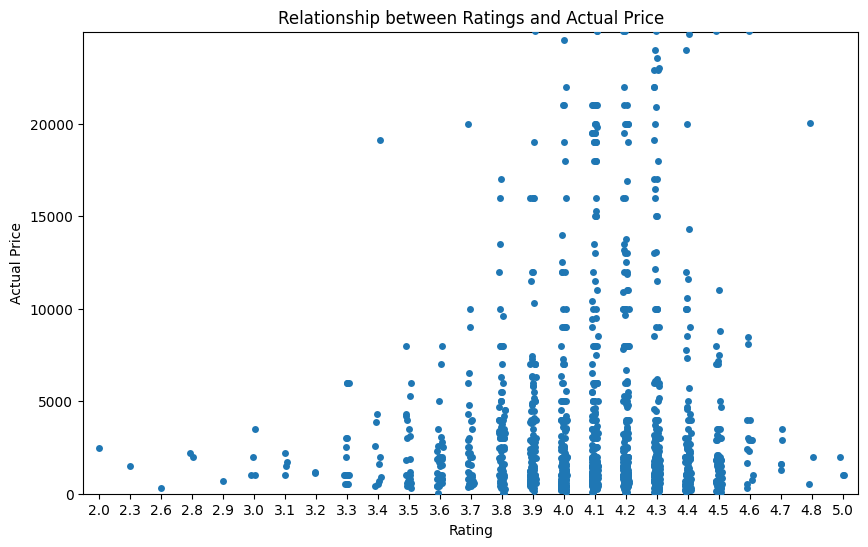

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('amazon.csv')

# Clean the 'actual_price' column, removing any non-numeric characters and converting to float
data['actual_price'] = data['actual_price'].str.replace('₹', '').str.replace(',', '')
data['actual_price'] = pd.to_numeric(data['actual_price'], errors='coerce')

# Drop any rows that have NaN values after this cleaning
data = data.dropna(subset=['actual_price'])

# Convert 'rating' column to numeric, coercing errors to NaN
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Drop any rows with NaN values that were resulted from conversion
data.dropna(subset=['rating', 'actual_price'], inplace=True)

# Now that 'rating' is numeric, we can calculate the correlation matrix again
correlation_matrix = data[['rating', 'actual_price']].corr()

# Print the correlation matrix
print("Correlation matrix:\n", correlation_matrix)

# Print the specific correlation value between 'rating' and 'actual_price'
specific_correlation = correlation_matrix.loc['rating', 'actual_price']
print("Specific correlation between 'rating' and 'actual_price':", specific_correlation)


high_price_cutoff = data['actual_price'].quantile(0.95)

# Scatter plot for rating vs actual price with jitter and adjusted y-axis limits
plt.figure(figsize=(10, 6))
sns.stripplot(data=data, x='rating', y='actual_price', jitter=True)
plt.title('Relationship between Ratings and Actual Price')
plt.xlabel('Rating')
plt.ylabel('Actual Price')
plt.ylim(0, high_price_cutoff)  # Using quantile to adjust the y-axis limit
plt.show()

In [ ]:
# Clean the 'discounted_price' column
#data['discounted_price'] = pd.to_numeric(data['discounted_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
data.dropna(subset=['discounted_price'], inplace=True)


# Calculate the correlation between 'rating' and 'discounted_price'
correlation_matrix = data[['rating', 'discounted_price']].corr()

# Print the specific correlation value between 'rating' and 'discounted_price'
print("Specific correlation between 'rating' and 'discounted_price':")
print(correlation_matrix.loc['rating', 'discounted_price'])

# Scatter plot for rating vs discounted price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='rating', y='discounted_price')
plt.title('Relationship between Ratings and Discounted Price')
plt.xlabel('Rating')
plt.ylabel('Discounted Price')
plt.show()


<ipython-input-7-d814ba908088>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[['rating', 'discounted_price']].corr()


Specific correlation between 'rating' and 'discounted_price':


KeyError: ignored

# Finding 2: Sentiment polarity and word frequency analysis

#Finding

The less positive reviews in health and personal care, home improvement, and musical instrument categories with home and medical supplies/equipment being the least positive subcategory, could be due to factors such as high customer expectations from these products, quality, durability, price sensitivity, or variability in the performance of these products.

In [ ]:
#Import libraries
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

#Calculate sentiment using TextBlob
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

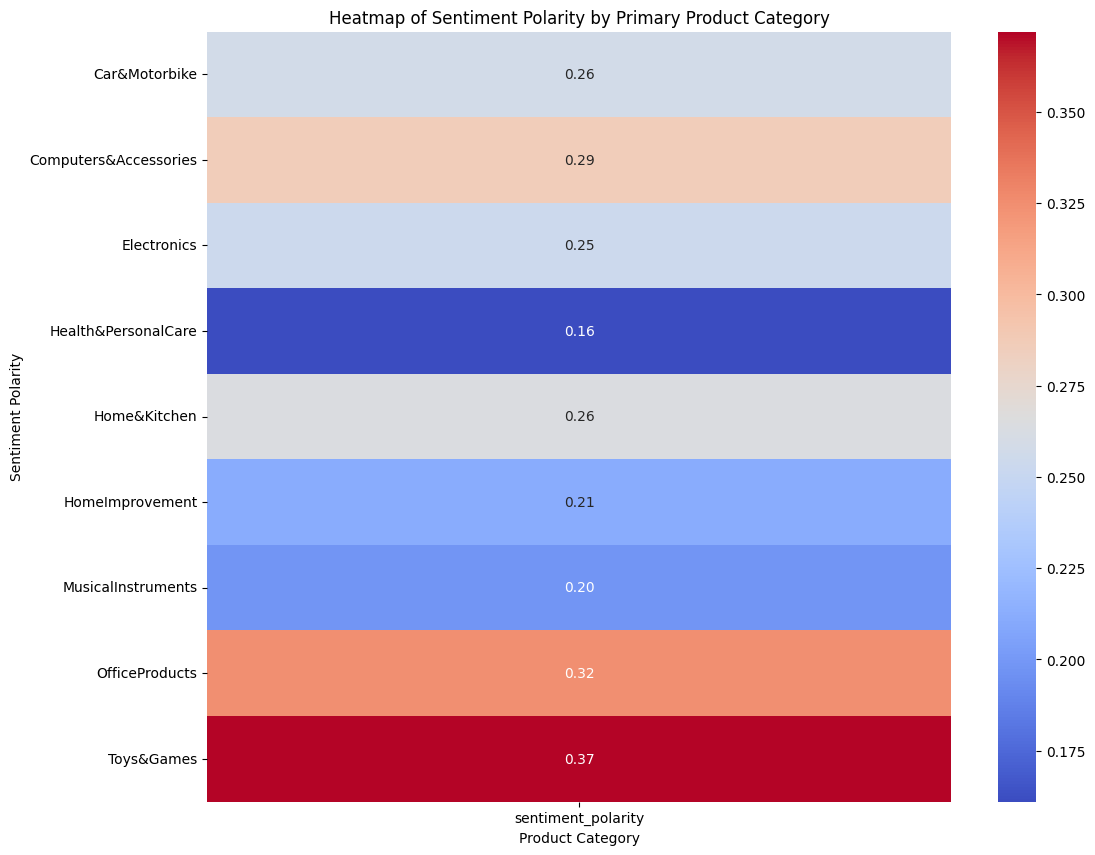

In [ ]:
#Create new column with sentiment scores
df['sentiment_polarity'] = df['review_content'].apply(calculate_sentiment)
#Extract primary category and create new column
df['primary_category'] = df['category'].str.split('|').str[0]
#Create pivot table to be used for heatmap
pivot_data = df.pivot_table(index='primary_category', values='sentiment_polarity', aggfunc='mean')
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Sentiment Polarity by Primary Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sentiment Polarity')
plt.show()

For subcategories: Home medical supplies and equipment has the most negative reviews while CraftMaterials is the highest.

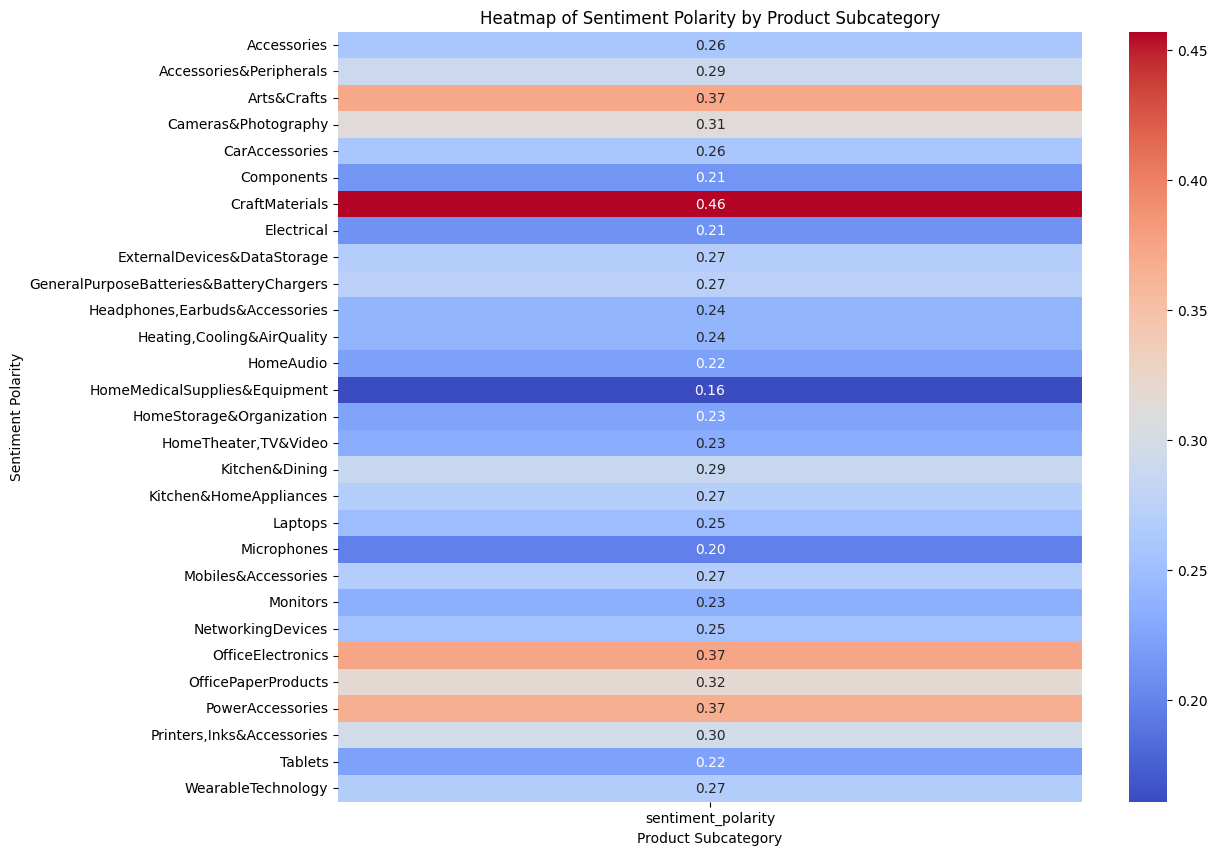

In [ ]:
#Extract subcategory and create new column
df['subcategory'] = df['category'].str.split('|').str[1]
#Fill with unknown just in case there is nothing
df['subcategory'] = df['subcategory'].fillna('Unknown')
#Create pivot table to be used for heatmap
pivot_data_subcategory = df.pivot_table(index='subcategory', values='sentiment_polarity', aggfunc='mean')
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_data_subcategory, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Sentiment Polarity by Product Subcategory')
plt.xlabel('Product Subcategory')
plt.ylabel('Sentiment Polarity')
plt.show()

What are customers saying throughout the dataset? This helps to get a good idea of what is repeating throughout the reviews in addition to looking at overall sentiment. For this purpose, only words relating directly to products will be taken into consideration.

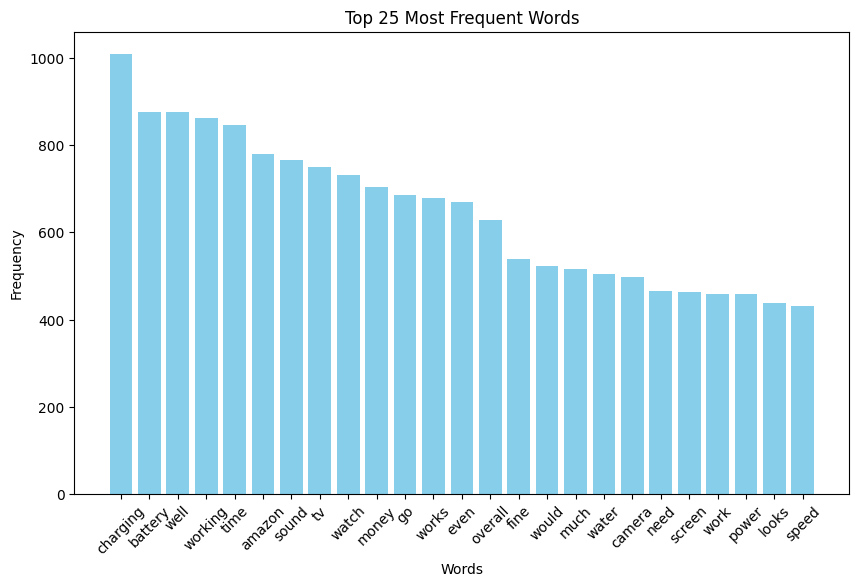

In [ ]:
#Import libraries
from collections import Counter
import re
import matplotlib.pyplot as plt

# Store rewiew data into variable
allReviews = ' '.join(data['review_content'].dropna()).lower()

# Convert text into words
words = re.findall(r'\b\w+\b', allReviews)

# List of words to be removed like generic terms and numbers
stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does",
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until",
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into",
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here",
    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more",
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now",
    "product", "quality", "use", "one", "price", "like", "also", "good", "great",
    "best", "better", "used", "using", "new", "buy", "bought", "purchase", "got",
    "get", "really", "excellent", "perfect", "nice", "amazing", "awesome", "fantastic",
    "superb", "wonderful", "ideal", "favorite", "favourite", "easy", "hard", "difficult",
    "bad", "poor", "fast", "slow", "quick", "heavy", "light", "big", "small", "large",
    "short", "long", "old", "young", "cheap", "expensive", "worth", "value", "recommend",
    "satisfied", "happy", "pleased", "disappointed", "unhappy", "love", "hate", "cable", "phone",
    # Numbers along with m because this was showing up on graph but is not related to products
    "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "m"
])

# Take out the stopwords
filteredWords = [word for word in words if word not in stopwords]

# Count frequency of words now
word_counts_filtered = Counter(filteredWords)

# Convert to DataFrame
freq_table_filtered = pd.DataFrame(word_counts_filtered.items(), columns=['Word', 'Frequency'])

# Frequency in descending order
freq_table_filtered = freq_table_filtered.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Look at top 25 words
top_n = 25
top_words_filtered = freq_table_filtered.head(top_n)

# Bar plot for visualization
plt.figure(figsize=(10, 6))
plt.bar(top_words_filtered['Word'], top_words_filtered['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 25 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

Words like charging, battery, sound, and speed can be analyzed to see if these are corresponding with the strengths or weaknesses of products.

# Managerial insight

These less positive reviews should be addressed by trying to figure out the causes which could be factors such as customer expectations, quality, price sensitivity, or variability in performance. There could be strategies such as additional product testing or adjusting the pricing strategy which can be used to address the issue of lower customer satisfaction in these categories.

# Finding 3: Predicting Product Rating

### We predict whether a particular transaction will have an above average rating, with the given data.

In [ ]:
# Double check data
df3.head()

In [ ]:
# Create new review length column for additional factors to utilise in prediction model
df3['review_len'] = df3.review_content.apply(len)

# Drop non-numeric columns for analysis
df3.drop(['product_name', 'category','product_id','about_product','user_id','review_id',
          'review_title','review_content'], axis=1, inplace = True)

# Convert all values to numeric
cols = df3.columns[df3.dtypes.eq('object')]
df3[cols] = df3[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
from currency_converter import CurrencyConverter
c = CurrencyConverter()
df3['actual_USD'] = df3.actual_price.apply(c.convert, args=('INR', 'USD'))
df3['dscntd_USD'] = df3.actual_price.apply(c.convert, args=('INR', 'USD'))

In [ ]:
# Check data before training models
df3.head(10)

#### We check the distribution of ratings on our products:

In [ ]:
# Distribution of ratings
sns.displot(df3.rating)

#### We check for the exact average rating:

In [ ]:
# Average rating
avg_rating = df3.rating.mean()
avg_rating

In [ ]:
# Create a new binary variable -> 1 for a rating > 4.0967, and 0 for a rating <= 4.0967.
df3['abavgrate'] = df3.rating.apply(lambda x: 1 if x>avg_rating else 0)
df3

In [ ]:
# Create X and Y
#X = discount_percentage, rating_count, review_len, actual_USD, dscntd_USD
#Y = above average rating? [1 = Yes, 0 = No]
X = df3.drop(['rating','abavgrate','actual_price','discounted_price'],axis=1)
Y = df3.abavgrate

In [ ]:
X

In [ ]:
Y

#### Our Y is 1 if the rating is above average, and 0 if the rating is below or equal to the average.

### Decision Tree

In [ ]:
# Train the decision tree classifier
# Shallow tree with max_depth=2 for easier interpretation
import sklearn as sk
import sklearn.tree as tree
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X,Y)

In [ ]:
import graphviz
# Visualize the decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
dot_data =tree.export_graphviz(dt, feature_names=dt_feature_names, class_names=dt_target_names, filled=True)
graph = graphviz.Source(dot_data)
graph

####Insights:

Purchases with <= 1503 ratings & cost > $54.39 have an above average rating if the review length is <= 256.4 chars, but below average otherwise.

Purchases with > 1503 ratings & < 73.5% discount have below average ratings.

Purchases with <= 1503 ratings & cost <= $54.39 have an above average rating if the discount percentage is > 11.5%, but below average otherwise.

Purchases with > 1503 ratings & >73.5% discount have an above average rating if the discounted price is > $95.99, but below average otherwise.


### Creating Training and Test sets

In [ ]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

train_test_split(X,Y,test_size=0.3,random_state = 0)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

### Checking Ratios

In [ ]:
len(X_train)/len(X)

In [ ]:
len(Y_train)/len(Y)

In [ ]:
len(X_test)/len(X)

In [ ]:
len(Y_test)/len(Y)

### Training on the training set

In [ ]:
cl = RandomForestClassifier(random_state = 0)

cl.fit(X_train,Y_train)

### Predictions on Test Set

In [ ]:
cl.predict(X_test)

#### Accuracy:

In [ ]:
(cl.predict(X_test) == Y_test).mean()

In [ ]:
y_pred = cl.predict(X_test)

In [ ]:
y_pred

#### And probability array:

In [ ]:
cl.predict_proba(X_test)

In [ ]:
y_pred_proba = cl.predict_proba(X_test)[:,1]

In [ ]:
y_pred_proba

### Scores:

##### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met
confusion_matrix(Y_test,y_pred)

#### Accuracy

In [ ]:
(y_pred == Y_test).mean()

In [ ]:
met.accuracy_score(Y_test, y_pred)

#### Precision

In [ ]:
met.precision_score(Y_test,y_pred)

#### Recall

In [ ]:
met.recall_score(Y_test,y_pred)

#### AUC Score

In [ ]:
met.roc_auc_score(Y_test,y_pred_proba)

### Overall Insights from Finding 3:
- In general, lower number of ratings and items with lower actual prices tend to have higher than average ratings.
- If the item is priced higher than $54 USD, a shorter length review tends to direct us to an above average rating. It is possible that longer reviews tend to be those that are complaining about the purchase.
- In general, higher discounts seem to illicit above average ratings.

- Provide an emphasis on selling less expensive products with high discounts, discounting at a lower frequency, rather than small discounts often

The prediction model based on discount %, number of ratings, review length, actual price, and discounted price can be used to help future decisions on pricing and discount strategies to maximise ratings and overall sentiment.

